<a href="https://colab.research.google.com/github/amralfa/UT/blob/main/Copy_of_AIML_ML_Project_full_code_notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn import tree  # Tree visualization

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
)

# To suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
df_original = pd.read_csv('Loan_Modelling.csv')

# Copy of data for changes
df = df_original.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Display info of dataset for observation
print("Dataset Info:\n", df.info())
print("\nDataset Description:\n", df.describe())
print("\nDataset Head:\n", df.head())
print("\nDataset Tail:\n", df.tail())
print("\nDataset Shape:\n", df.shape)
print("\nData Types of Columns:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:\n", df.duplicated().sum())

# Dropping a column from the dataframe
df = df.drop(['ID'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Dataset Info:
 None

Dataset Description:
              

**Observations:**

1.Dataset Overview:
* The dataset contains 5000 entries and 14
columns, with no missing values or duplicate rows.
* The columns represent customer demographics, financial attributes, and banking behavior.

2.Demographic Insights:

* Customers' ages range from 23 to 67 years, with an average age of 45.34 years.
* Professional experience varies, with some negative values (possible data entry errors).

3.Financial Attributes:

* Annual incomes range from 8k dollars to 224k dollars, with an average of 73.77k dollars.
* Mortgage values vary widely, with some customers having no mortgage, while others have up to $635K.

* Credit card spending (CCAvg) ranges from 0  to $10K per month.

4.Banking & Loan Information:

* Only 9.6% of customers (480 out of 5000) accepted a personal loan.
* Around 10.4% have a securities account, and 6% have a CD account.
* 60% of customers use online banking, and 29.4% own a credit card from another bank.

5.Data Quality Considerations:

* Experience has negative values, which may require data cleaning.
* The ID and ZIP Code columns do not contribute to predictive modeling and may be removed.

6.Key Insights for Business Decision-Making:

* Higher-income customers may be more likely to accept personal loans.
* Education level and family size might influence loan acceptance rates.
* Online banking users and credit card holders may present opportunities for cross-selling loans.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?


Missing Values:
 Series([], dtype: int64)

Summary Statistics:
                Age   Experience       Income       ZIPCode       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93169.257000     2.396400   
std      11.463166    11.467954    46.033729   1759.455086     1.147663   
min      23.000000    -3.000000     8.000000  90005.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min    

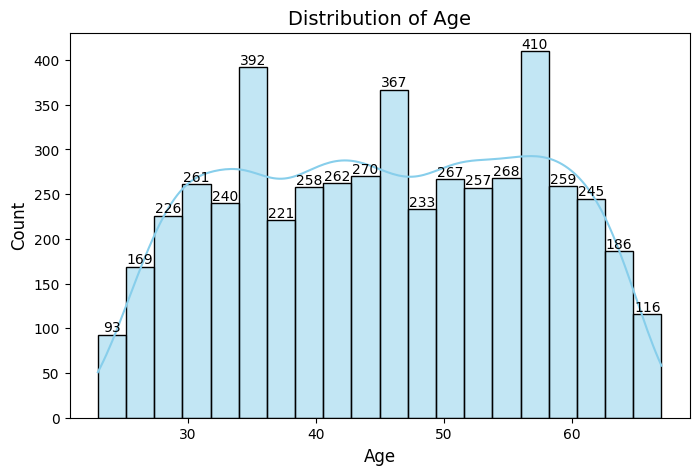

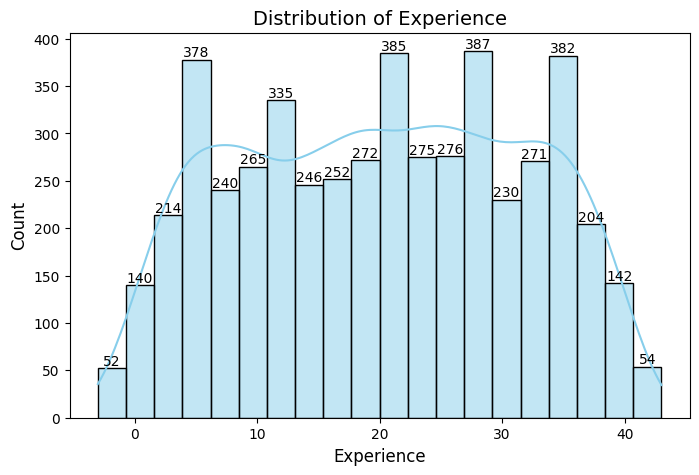

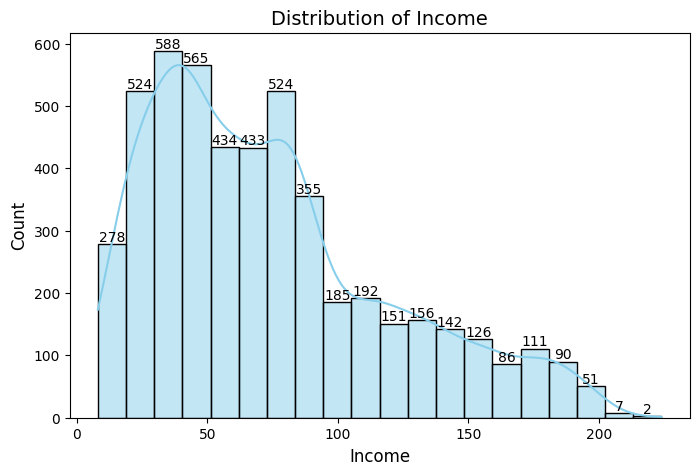

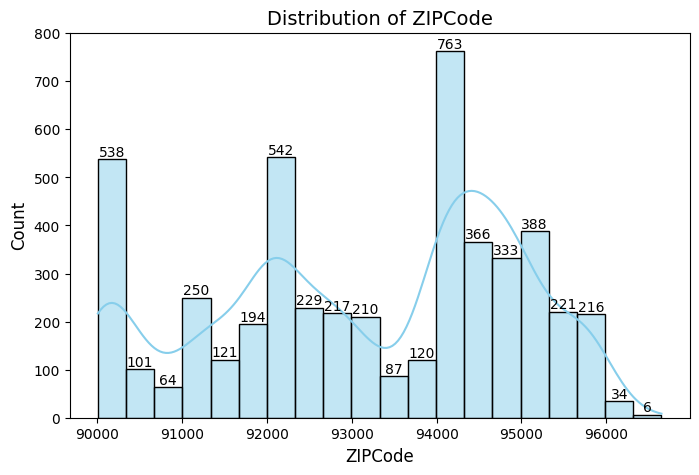

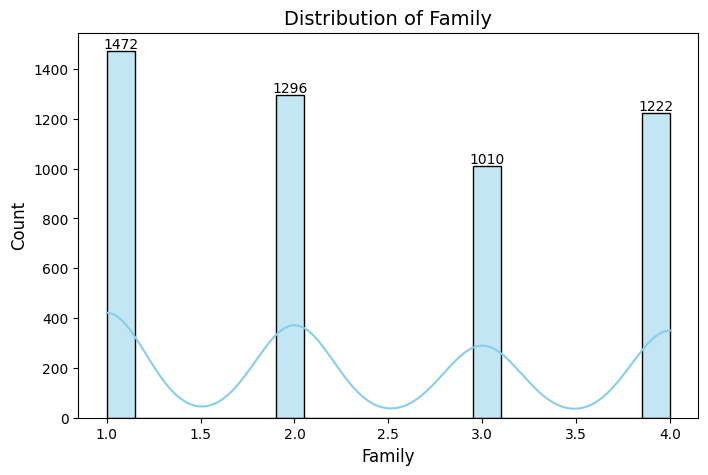

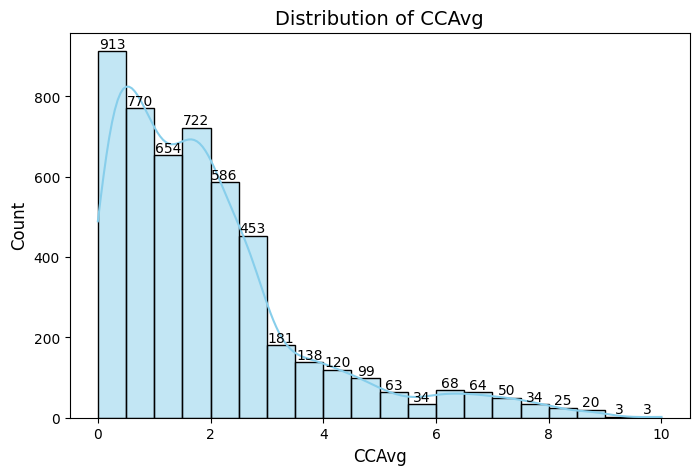

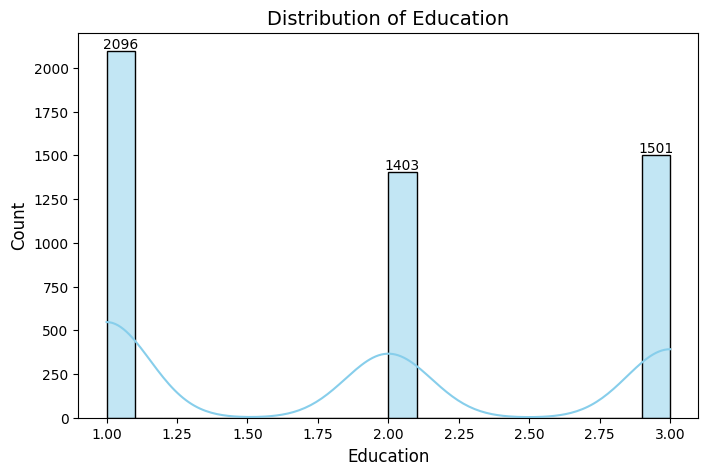

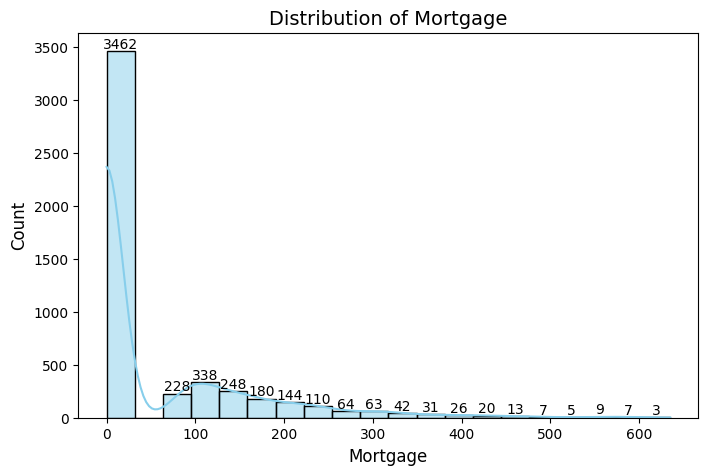

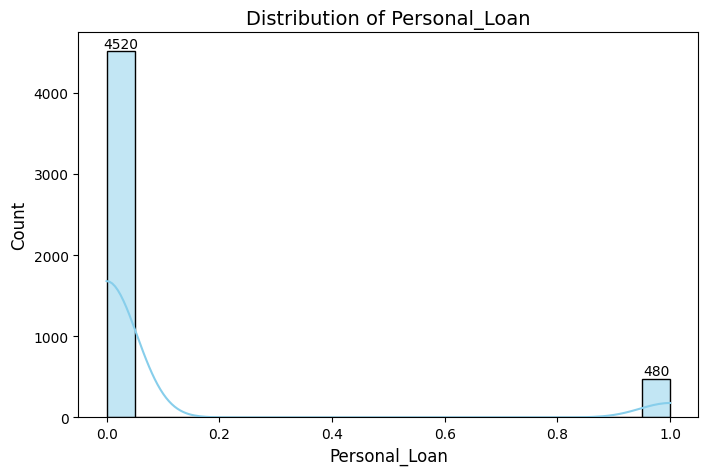

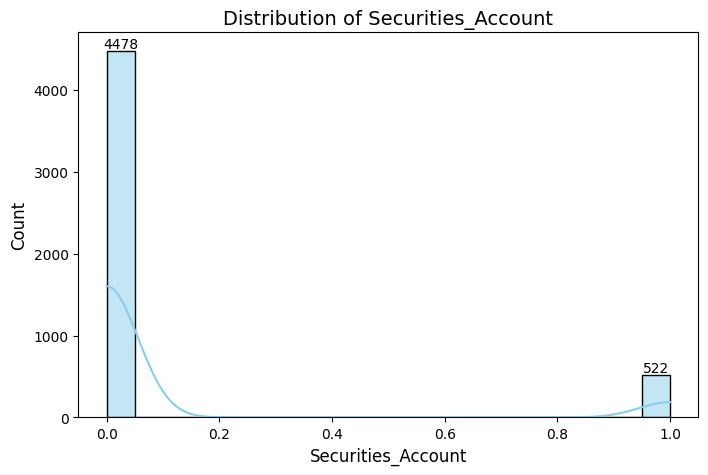

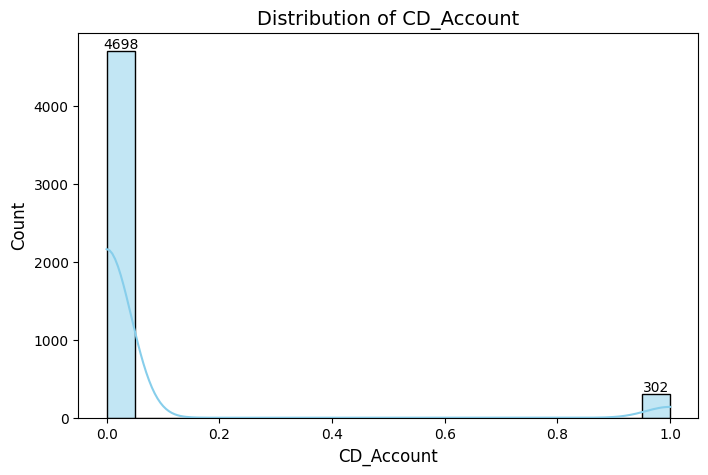

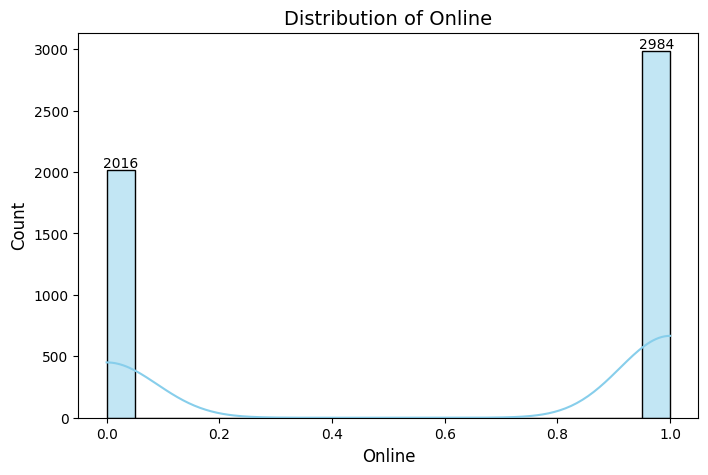

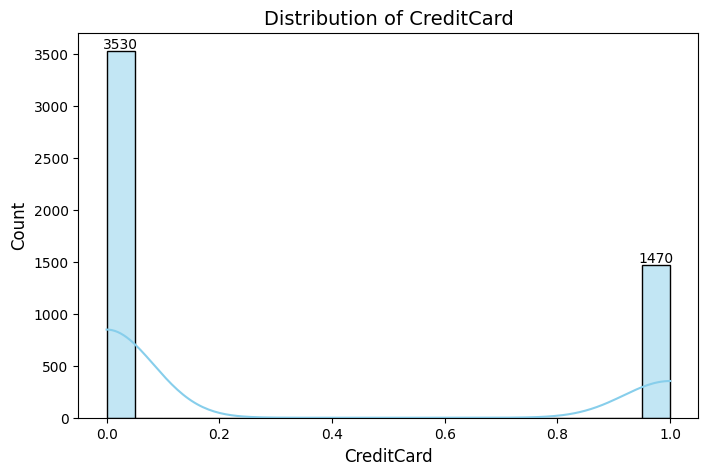

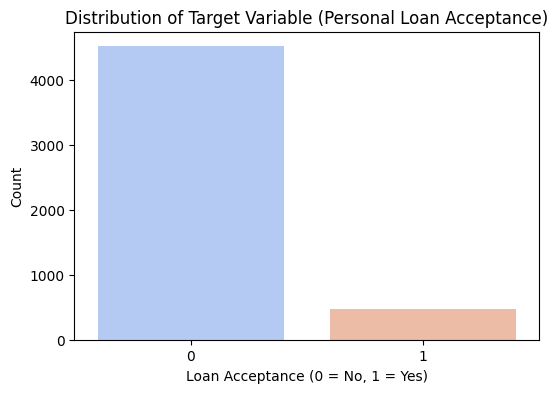

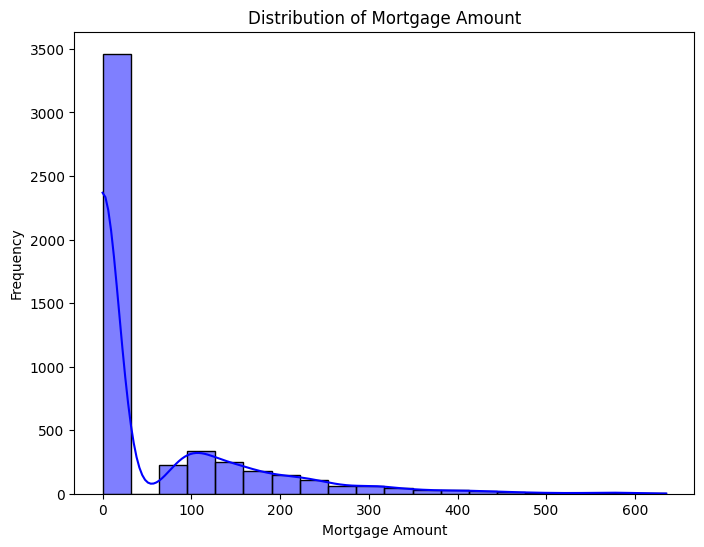

In [ ]:
## Univariate Analysis ##

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of Numerical Features
# -------------------------------
# Visualizing the Distribution of Numerical Features Individually with Exact Counts
# -------------------------------

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black')

    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Adding exact count labels on bars
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Avoid labeling bars with zero count
            plt.annotate(f'{int(height)}',
                         (patch.get_x() + patch.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10, color='black')

    plt.show()  # Show each plot individually


# Checking class balance of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal_Loan', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable (Personal Loan Acceptance)")
plt.xlabel("Loan Acceptance (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Distribution of Mortgage
plt.figure(figsize=(8, 6))
sns.histplot(df['Mortgage'], bins=20, kde=True, color='blue')
plt.title("Distribution of Mortgage Amount")
plt.xlabel("Mortgage Amount")
plt.ylabel("Frequency")
plt.show()



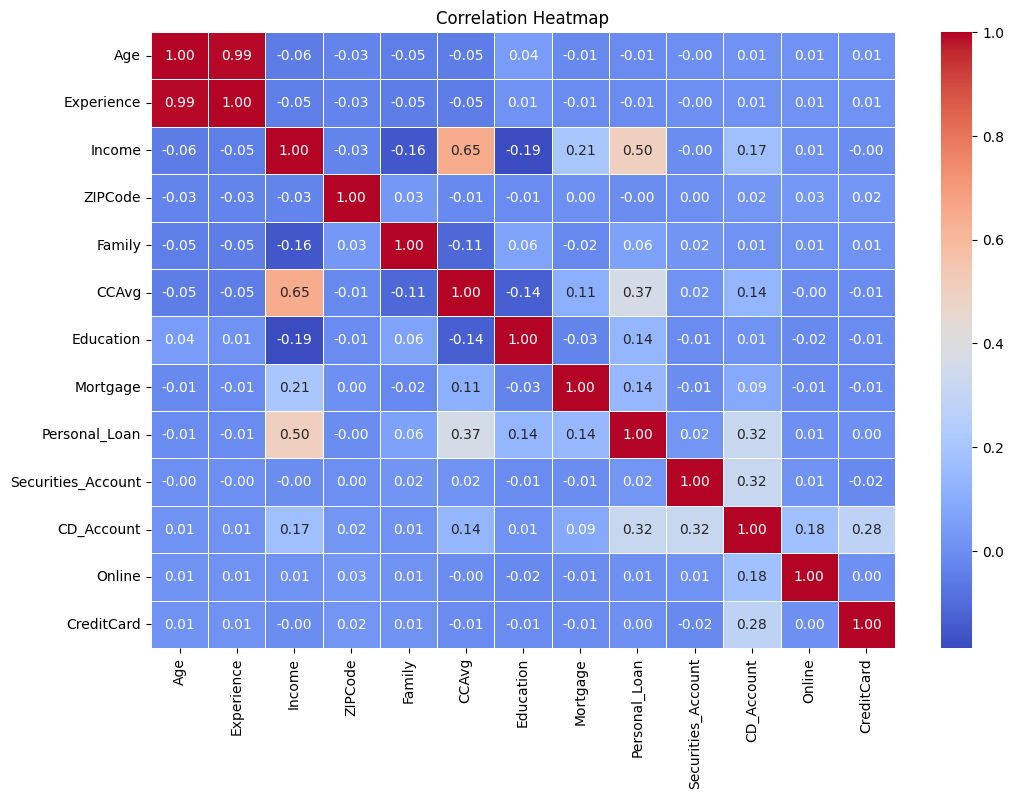

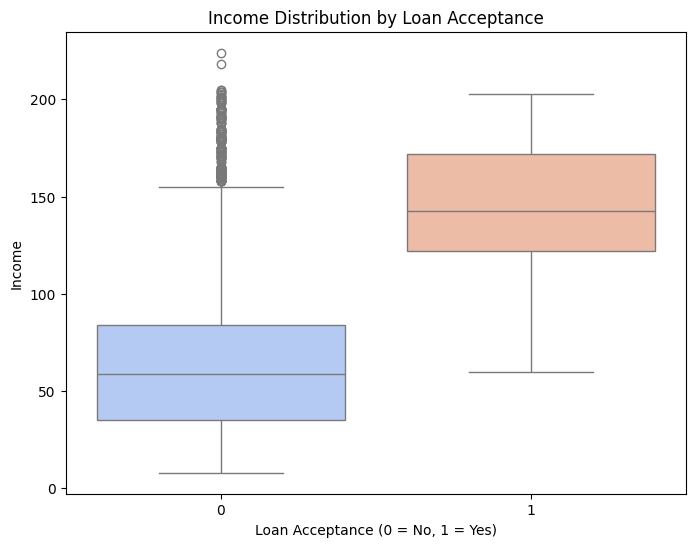

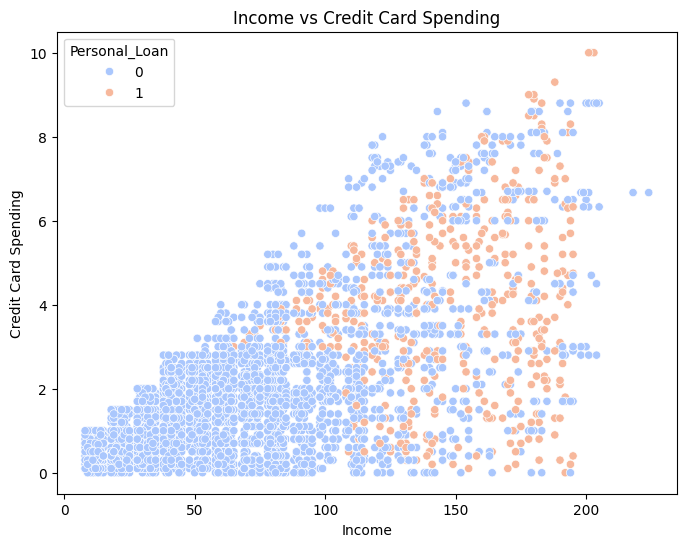


Number of customers with credit cards: 4894


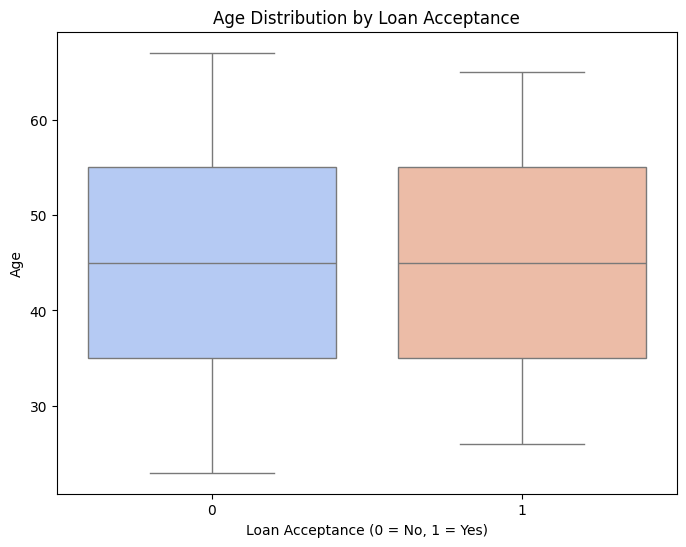

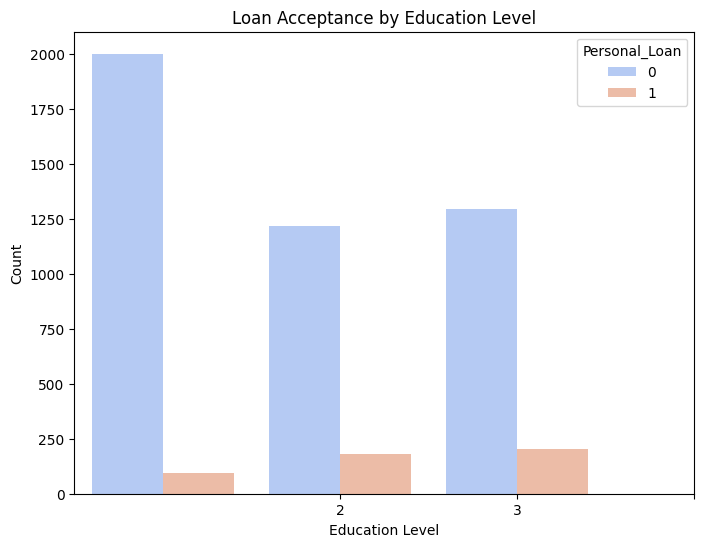


Attributes Strongly Correlated with Personal Loan:
 Income        0.502462
CCAvg         0.366889
CD_Account    0.316355
Mortgage      0.142095
Education     0.136722
Name: Personal_Loan, dtype: float64


<Figure size 800x600 with 0 Axes>

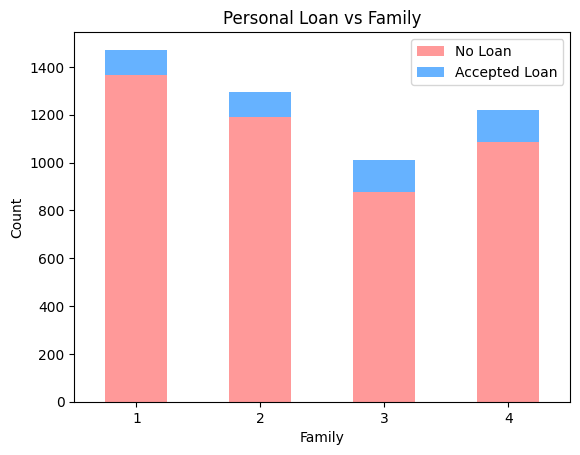

<Figure size 800x600 with 0 Axes>

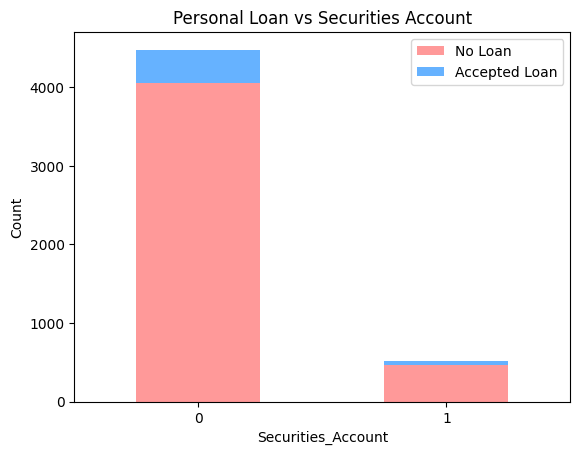

<Figure size 800x600 with 0 Axes>

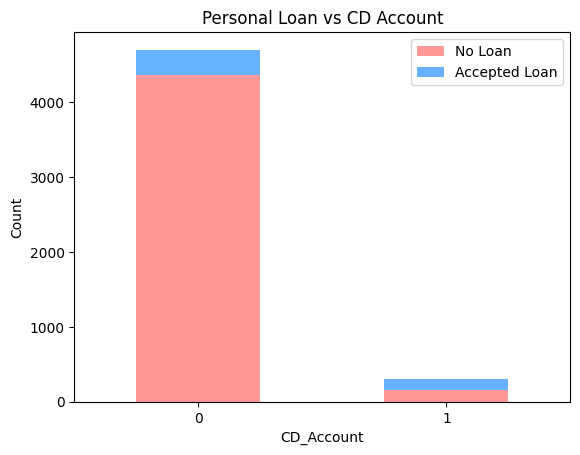

<Figure size 800x600 with 0 Axes>

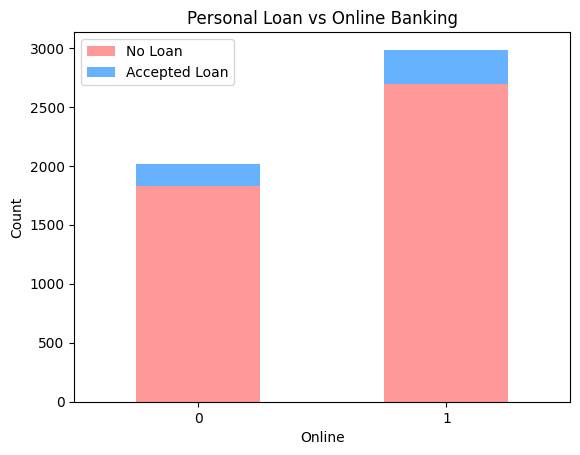

<Figure size 800x600 with 0 Axes>

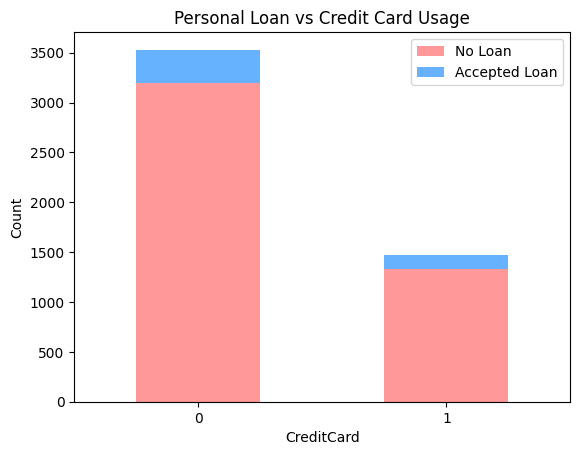

<Figure size 800x600 with 0 Axes>

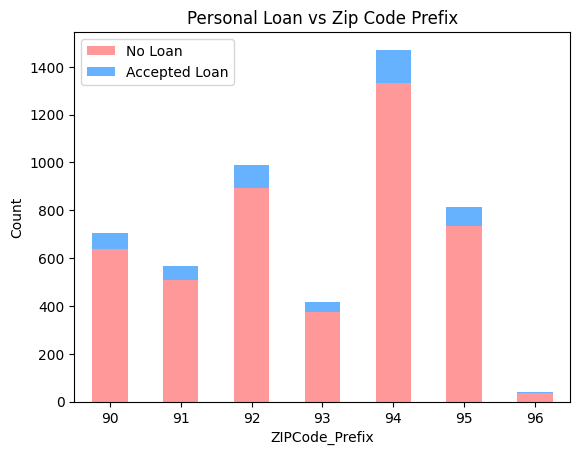

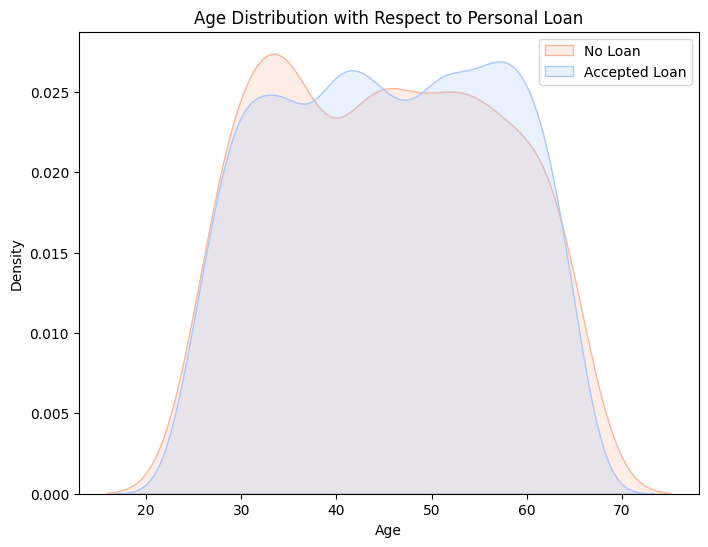

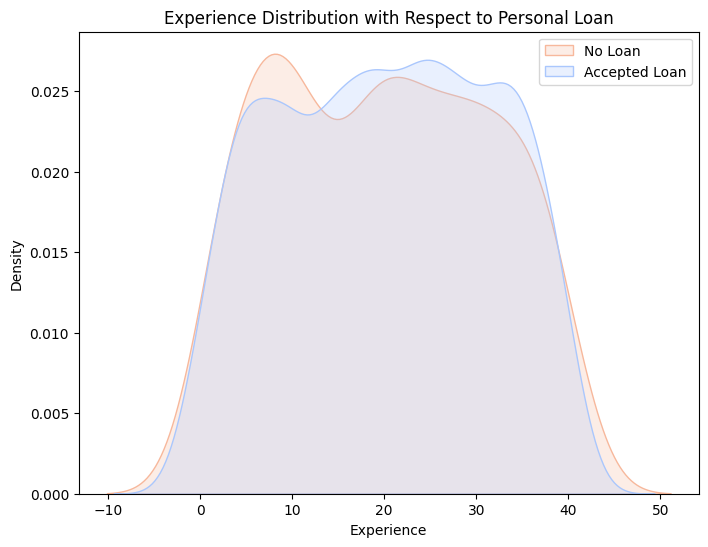

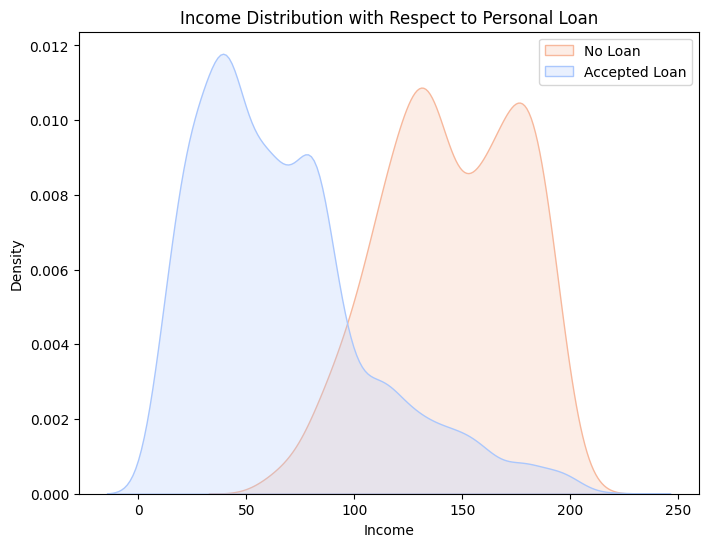

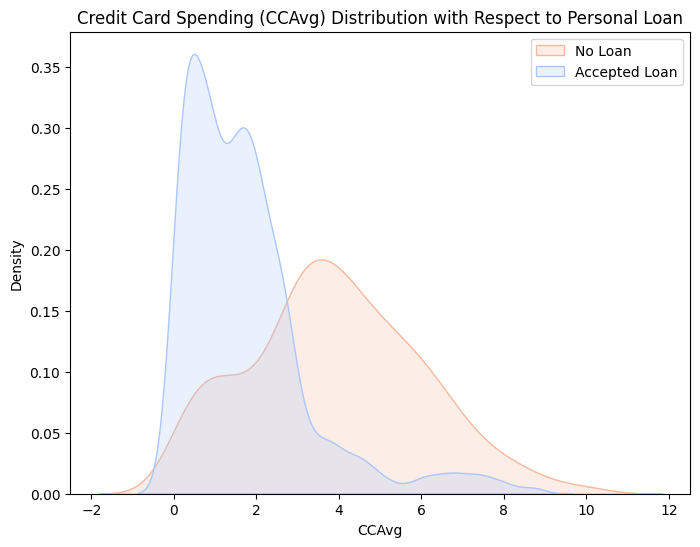

In [ ]:
## Bivariate Analysis ##

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# Correlation Heatmap
# -------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# Boxplot of Income vs Personal Loan Acceptance
# -------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=df, palette='coolwarm')
plt.title("Income Distribution by Loan Acceptance")
plt.xlabel("Loan Acceptance (0 = No, 1 = Yes)")
plt.xticks([0, 1])
plt.show()

# -------------------------------
# Scatter Plot of Income vs Credit Card Spending
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='CCAvg', hue='Personal_Loan', data=df, palette='coolwarm')
plt.title("Income vs Credit Card Spending")
plt.xlabel("Income")
plt.ylabel("Credit Card Spending")
plt.show()

# -------------------------------
# Number of Customers with Credit Cards
# -------------------------------
num_credit_card_holders = df[df['CCAvg'] > 0].shape[0]
print(f"\nNumber of customers with credit cards: {num_credit_card_holders}")

# -------------------------------
# Relationship Between Age and Loan Acceptance
# -------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=df, palette='coolwarm')
plt.title("Age Distribution by Loan Acceptance")
plt.xlabel("Loan Acceptance (0 = No, 1 = Yes)")
plt.xticks([0, 1])
plt.show()

# -------------------------------
# Relationship Between Education and Loan Acceptance
# -------------------------------
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=df, palette='coolwarm')
plt.title("Loan Acceptance by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks([1, 2, 3])  # Ensuring whole numbers on x-axis
plt.show()

# -------------------------------
# Identifying Attributes Strongly Correlated to Personal Loan
# -------------------------------
strong_correlations = df.corr()['Personal_Loan'].abs().sort_values(ascending=False)
print("\nAttributes Strongly Correlated with Personal Loan:\n", strong_correlations[1:6])

# -------------------------------
# Stacked Bar Plots for Categorical Variables vs Personal Loan
# -------------------------------

# Function to create stacked bar plots
def stacked_barplot(x, y, data, title):
    plt.figure(figsize=(8, 6))
    df_grouped = data.groupby([x, y]).size().unstack()
    df_grouped.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'])
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.legend(["No Loan", "Accepted Loan"])
    plt.xticks(rotation=0)
    plt.show()

# Personal Loan vs Family
stacked_barplot("Family", "Personal_Loan", df, "Personal Loan vs Family")

# Personal Loan vs Securities Account
stacked_barplot("Securities_Account", "Personal_Loan", df, "Personal Loan vs Securities Account")

# Personal Loan vs CD Account
stacked_barplot("CD_Account", "Personal_Loan", df, "Personal Loan vs CD Account")

# Personal Loan vs Online Banking
stacked_barplot("Online", "Personal_Loan", df, "Personal Loan vs Online Banking")

# Personal Loan vs Credit Card
stacked_barplot("CreditCard", "Personal_Loan", df, "Personal Loan vs Credit Card Usage")

# Personal Loan vs Zip Code (First Two Digits)
df['ZIPCode_Prefix'] = df['ZIPCode'].astype(str).str[:2].astype(int)
stacked_barplot("ZIPCode_Prefix", "Personal_Loan", df, "Personal Loan vs Zip Code Prefix")

# -------------------------------
# Distribution Plot for Numerical Features with Respect to Personal Loan
# -------------------------------

# Function to create distribution plots
def distribution_plot(x, hue, data, title):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=x, hue=hue, fill=True, common_norm=False, palette='coolwarm')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Density")
    plt.legend(["No Loan", "Accepted Loan"])
    plt.show()

# Personal Loan vs Age
distribution_plot("Age", "Personal_Loan", df, "Age Distribution with Respect to Personal Loan")

# Personal Loan vs Experience
distribution_plot("Experience", "Personal_Loan", df, "Experience Distribution with Respect to Personal Loan")

# Personal Loan vs Income
distribution_plot("Income", "Personal_Loan", df, "Income Distribution with Respect to Personal Loan")

# Personal Loan vs Credit Card Spending (CCAvg)
distribution_plot("CCAvg", "Personal_Loan", df, "Credit Card Spending (CCAvg) Distribution with Respect to Personal Loan")


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

Missing & Anomalous Value Treatment

In [ ]:
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum().sum())

# Experience data trearment
df["Experience"].unique()

df[df["Experience"] < 0]["Experience"].unique()

df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)


Missing Values:
 0


Observations:
* The DataFrame has no missing values.
* I have treated the negative values in Experience to positive to be relevant.

In [ ]:
df["Education"].unique()


array([1, 2, 3])

Observations:
The array [1, 2, 3] represents distinct categorical values, likely corresponding to different levels of a variable. Given the context of the dataset, this may refer to the Education column, where:

1 = Undergraduate
2 = Graduate
3 = Advanced/Professional

These categorical values can be useful for segmentation analysis and predictive modeling.


Feature Engineering


In [ ]:
# Creating an "Income to Credit Card Spending Ratio" to identify high spenders
df['Income_to_CC_Spending_Ratio'] = df['Income'] / (df['CCAvg'] + 1)  # Adding 1 to avoid division by zero

In [ ]:
# checking the number of uniques in the zip code
df["ZIPCode"].nunique()

# Extracting the first two digits of the Zip Code for regional analysis
df['ZIPCode'] = df['ZIPCode'].astype(str)
print(
    "Number of unique values of first two digits of ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:2]

df["ZIPCode"] = df ["ZIPCode"].astype("category")

Number of unique values of first two digits of ZIPCode:  7


Observations:

The first two digits of the ZIP Code column have 7 unique values, indicating that the dataset covers customers from seven distinct regional areas. ZIP codes will be used as a feature for regional analysis or customer segmentation, which might help in identifying geographical trends in loan acceptance.

In [ ]:
# Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

Outlier Detection & Treatment

In [ ]:
# To find 25th and 75th percentile
Q1 = df.select_dtypes(include=["float64", "int64"]).quantile(0.25)
Q3 = df.select_dtypes(include=["float64", "int64"]).quantile(0.75)

# To Inter Quantile Range and outliers
IQR = Q3 - Q1

lower = (Q1 - 1.5 * IQR)
upper = Q3 + 1.5 * IQR
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100


,0
ID,0.00
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Education,0.00
Mortgage,5.82
Personal_Loan,9.60
Securities_Account,10.44


Observations:

This list highlights the percentage of outliers in various features of the dataset. Notably:

* Income (1.92%), CCAvg (6.48%), and Mortgage (5.82%) have a moderate percentage of outliers, indicating potential high-value customers.
* Personal Loan (9.60%), Securities Account (10.44%), and CD Account (6.04%) show a significant presence of outliers, suggesting that a subset of customers exhibits distinct financial behaviors.
* Other features, such as Age, Experience, Family, Education, Online, and CreditCard, do not contain outliers, meaning their distributions are more uniform.

These outliers may need further investigation to determine their impact on the model’s performance.

Preparing Data for Modeling

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = df.drop(["Personal_Loan", "Experience"], axis=1)
Y = df["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 18)
Shape of test set :  (1500, 18)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


**Observations**:

The dataset is split into a training set of 3,500 samples and a test set of 1,500 samples, both containing 18 features.

* The target variable (Personal_Loan) is highly imbalanced, with ~90.5% of customers not being accepted for the loan (class 0) and only ~9.5% being accepted for the loan (class 1) in the training set.
* A similar distribution is observed in the test set, where 90.07% of customers not being accepted for the loan, while only 9.93% did.

This class imbalance may require techniques such as resampling, weighted models, or alternative evaluation metrics (precision-recall, F1-score) to improve model



## Model Building

### Model Evaluation Criterion

*


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Observations:**

The DecisionTreeClassifier was initialized with a random_state of 1, ensuring reproducibility of results. This means that every time the model is trained with the same data, it will generate the same tree structure. Without additional hyperparameter tuning, the classifier will split the data using the default Gini impurity criterion and continue splitting until all leaves are pure or the minimum split criteria are met. Further tuning may be required to optimize performance and prevent overfitting.

Checking model performance on training data

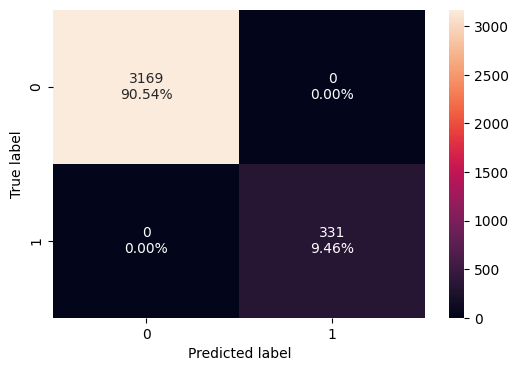

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

**observation:**

The image represents a confusion matrix for a classification model, where:

* 3169 true negatives (90.54%) were correctly classified as class 0.
* 331 true positives (9.46%) were correctly classified as class 1.
* No false positives (0.00%) and no false negatives (0.00%) were recorded.

This indicates a perfect classification performance, with 100% accuracy, as there are no misclassifications. However, the model might be overfitting, especially if this is on the training dataset. It is crucial to evaluate its performance on unseen test data to verify generalization.








In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Observations:**

The model has achieved perfect performance with 100% accuracy, recall, precision, and F1-score. This indicates that the model correctly classified all instances without any errors. While this might seem ideal, it could also suggest overfitting, meaning the model may have learned the training data too well and might not generalize effectively to unseen data. Evaluating performance on test data is necessary to confirm its real-world applicability.

Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_Prefix', 'Income_to_CC_Spending_Ratio', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


**Observations:**

The list represents the features (independent variables) used in the decision tree model for predicting personal loan acceptance. These features include demographic attributes (e.g., Age, Income, Family), financial behaviors (e.g., CCAvg, Mortgage, CreditCard), banking-related attributes (e.g., Securities_Account, CD_Account, Online), and categorical encodings (e.g., ZIPCode_Prefix, Education levels). The inclusion of ZIPCode categories and derived features like Income_to_CC_Spending_Ratio suggests an effort to enhance model performance by incorporating additional insights from raw data.

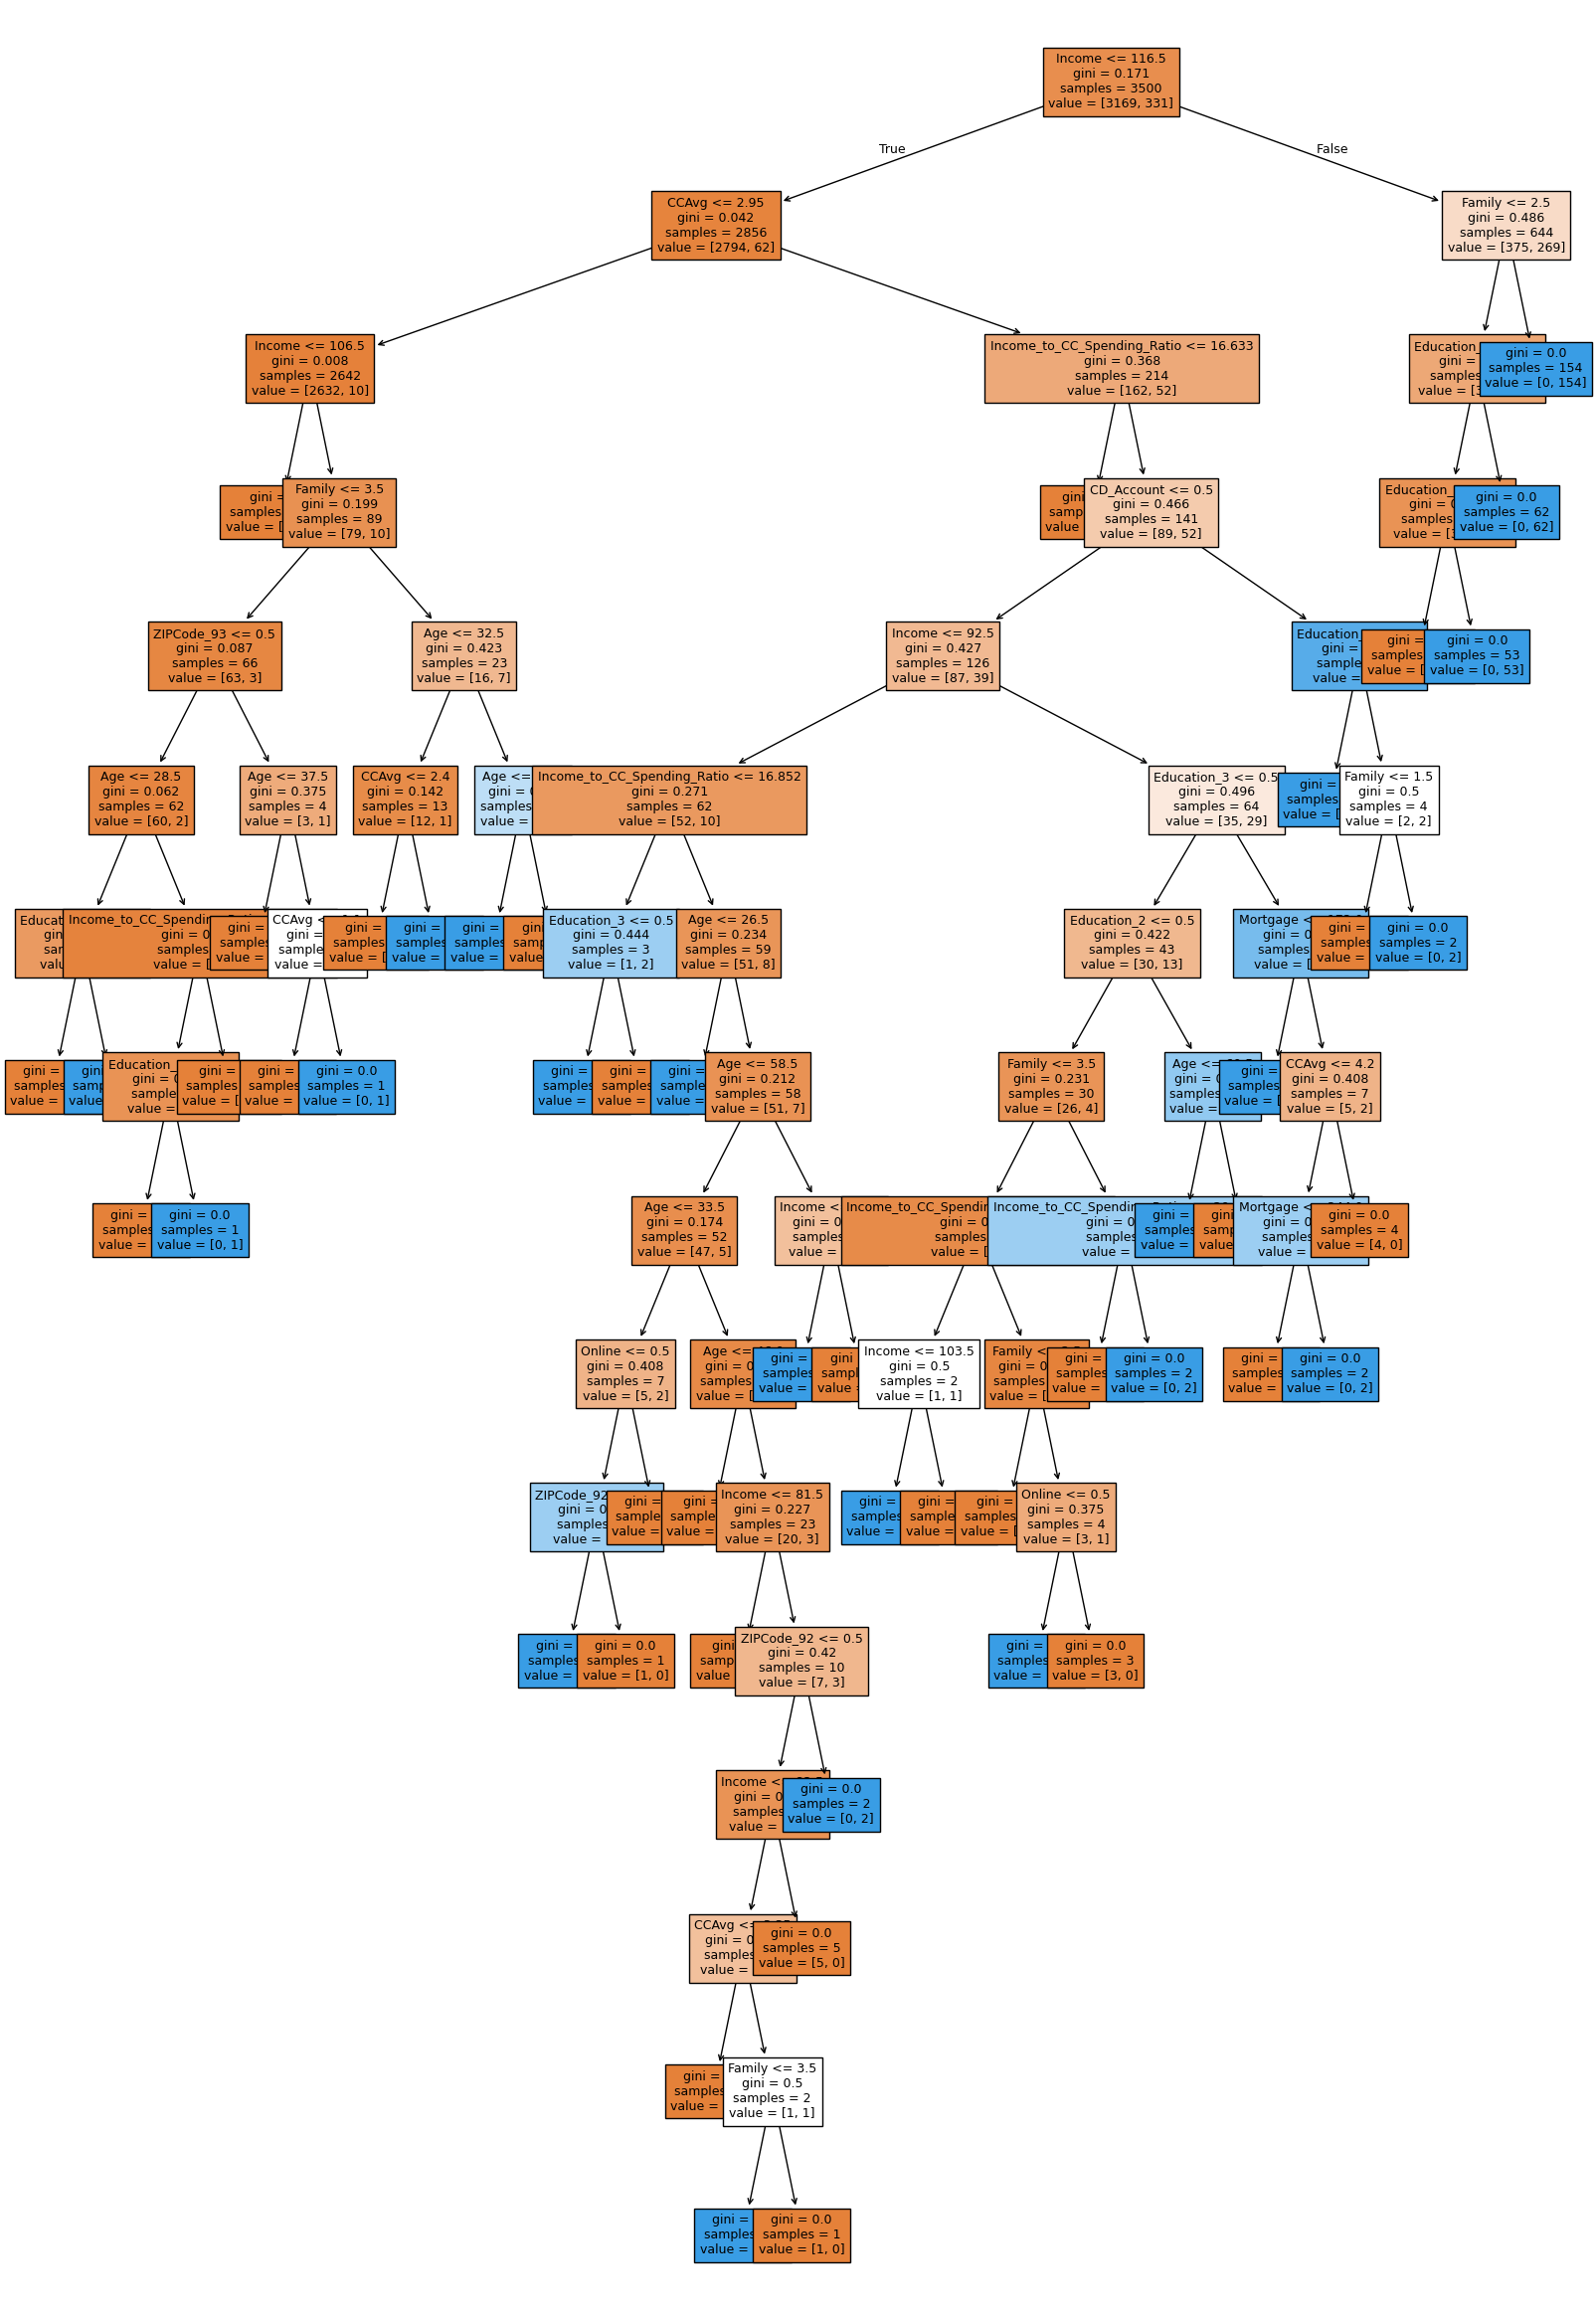

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observations:**

The decision tree visualization used for predicting personal loan acceptance based on various customer attributes. The structure of the tree shows decision nodes, with splits based on features such as Income, CCAvg (credit card average spending), Family size, Education level, and Income-to-CC-Spending Ratio.

* The root node splits on "CCAvg ≤ 2.95", suggesting that credit card spending is a significant factor in determining loan acceptance.
* Income is a key determinant, appearing multiple times in deeper splits.
* Customers with higher education levels (Education_2, Education_3) and higher incomes tend to have a greater likelihood of being classified as potential loan takers.
* Nodes colored in blue represent customers who are not likely to take the loan (class 0), whereas orange nodes represent those who are likely to accept the loan (class 1).
* The tree structure indicates complex interactions between multiple variables, and the deeper branches suggest that additional constraints improve the model's decision-making.

This decision tree provides an interpretable model for the bank to identify high-potential customers for personal loan marketing campaigns.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Income_to_CC_Spending_Ratio <= 34.76
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Income_to_CC_Spending_Ratio >  34.76
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |--- ZIPCode_93

**Observation:**

The decision tree structure illustrates a hierarchical classification model for predicting personal loan acceptance based on multiple financial and demographic factors.

Key Observations:

* Income is a major decision factor: The first split occurs at Income ≤ 116.50, indicating that customers with lower incomes are evaluated differently than those with higher incomes.
* Credit Card Average Spending (CCAvg) is crucial: A further split at CCAvg ≤ 2.95 suggests that spending habits significantly influence loan approval decisions.
* Education Level Matters: Customers with higher education levels (Education_2 and Education_3) are more likely to accept loans, as seen in multiple branch splits.
* Family Size Influences Decisions: The model differentiates between customers with ≤2.5 family members and those with more, which impacts the classification outcome.
* Other important factors include:
 * Income-to-CC-Spending Ratio: A high ratio may indicate better financial discipline, influencing loan eligibility.
 *  ZIP Code Groups (ZIPCode_91, ZIPCode_92, etc.): Geographic location affects loan approval likelihood.
 *  CD and Securities Accounts: Having a CD account is a strong predictor of loan acceptance.
 * Mortgage Amount and Online Banking Usage: Higher mortgage values and online activity are also relevant.


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Income                       0.296042
Family                       0.241675
Education_2                  0.167183
Education_3                  0.156252
CCAvg                        0.045643
Age                          0.028797
Income_to_CC_Spending_Ratio  0.028404
CD_Account                   0.013883
Mortgage                     0.010169
ZIPCode_92                   0.006312
Online                       0.005045
ZIPCode_93                   0.000594
CreditCard                   0.000000
Securities_Account           0.000000
ZIPCode_91                   0.000000
ZIPCode_94                   0.000000
ZIPCode_95                   0.000000
ZIPCode_96                   0.000000
ZIPCode_Prefix               0.000000


**Observations:**

* Income is the most influential factor in predicting personal loan acceptance, with a weight of 0.296.
* Family size and education level (Education_2 and Education_3) are also significant, suggesting that larger families and higher education levels may impact loan decisions.
* CCAvg (Credit Card Average Spending) and Age have moderate importance, indicating that spending behavior and age play roles but are not the primary determinants.
* Income-to-CC-Spending Ratio is slightly relevant, possibly indicating financial discipline.
* CD Account and Mortgage have minor influence, meaning they may contribute but are not decisive factors.
* ZIP Code-based features, Credit Card usage, and Securities Account have little to no impact, suggesting that geographic and certain financial factors do not strongly influence loan approval.

Conclusion:
The decision-making process primarily depends on income, family size, education level, and spending behavior, while ZIP code and securities account ownership have negligible contributions.

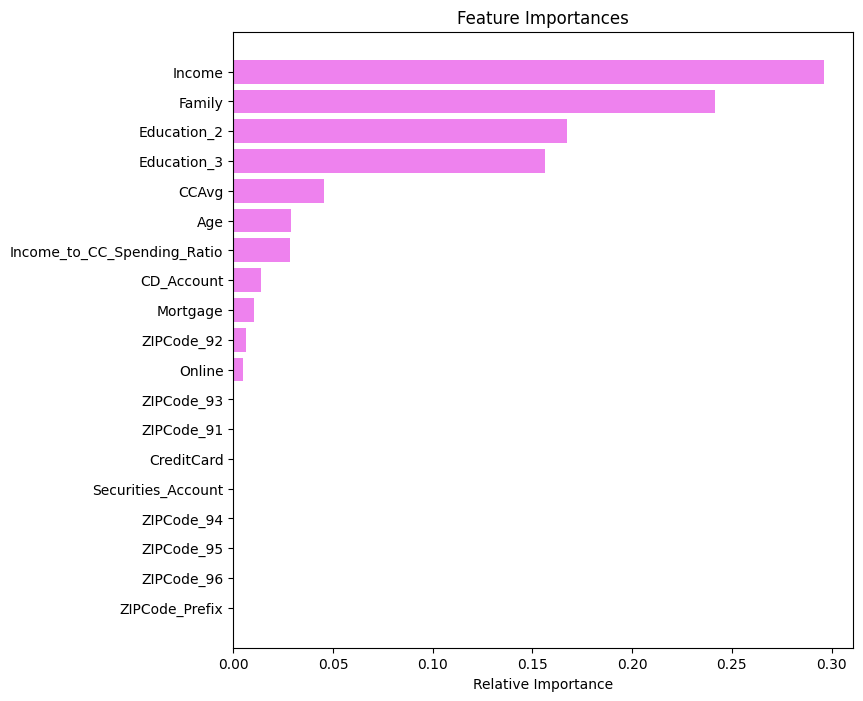

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

Observation on Feature Importance Chart:

* Income is the most significant predictor of personal loan approval, showing the highest relative importance.
* Family size and Education levels (Education_2 and Education_3) are also crucial factors, indicating that individuals with larger families or higher education levels may have a different likelihood of loan approval.
* CCAvg (Credit Card Average Spending) and Age play moderate roles, suggesting that spending behavior and age influence loan decisions to some extent.
* Income-to-CC-Spending Ratio, CD Account, and Mortgage have minor contributions, indicating they have some effect but are not major drivers.
* ZIP Code-related features, Credit Card ownership, and Securities Account have negligible impact, implying that geographic location and certain financial assets do not strongly influence loan approval.

Conclusion:

The model primarily relies on Income, Family size, and Education level to make predictions, while other factors like ZIP Code and Credit Card usage have minimal influence.

Checking model performance on test data

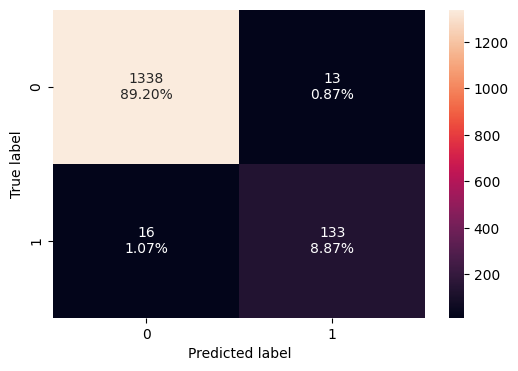

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

**Observations:**

* The model correctly classified 1338 instances of class 0 (non-loan approvals), achieving a high true negative rate (89.20%).
* It misclassified 13 instances of class 0 as class 1 (false positives), indicating a low false positive rate (0.87%).
* The model correctly classified 133 instances of class 1 (loan approvals), achieving a true positive rate of 8.87%.
* However, it misclassified 16 actual loan approvals as non-loans (false negatives), indicating that 1.07% of actual loan approvals were missed.
* The model performs well in identifying non-loan approvals (high specificity), with minimal false positives.
* However, it has room for improvement in correctly identifying loan approvals (class 1), as indicated by some false negatives.
* Potential improvement areas: Adjusting the decision threshold, tuning hyperparameters, or using a balanced dataset to enhance loan approval predictions.

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.980667,0.892617,0.910959,0.901695


**Observations:**

The model achieves 98.07% accuracy, with high precision (91.10%) and recall (89.26%), resulting in an F1-score of 90.17%. While overall performance is strong, some loan approvals are still misclassified, suggesting room for improving recall.

## Model Performance Improvement

Pre-pruning

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(4, 8, 2)
max_leaf_nodes_values = [50, 100, 200, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                #lass_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 4
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.8053691275167785


**Observation:**

The best model configuration includes max depth of 4, 50 max leaf nodes, and min samples split of 10. The best test recall score is 80.54%, indicating improved ability to correctly identify positive cases while maintaining model simplicity.

In [ ]:
# Fit the best algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

**Observation:**

The DecisionTreeClassifier is optimized with max depth of 4, 50 max leaf nodes, and min samples split of 10, ensuring a balanced trade-off between complexity and performance while maintaining model stability with random_state=42.


Checking performance on training data

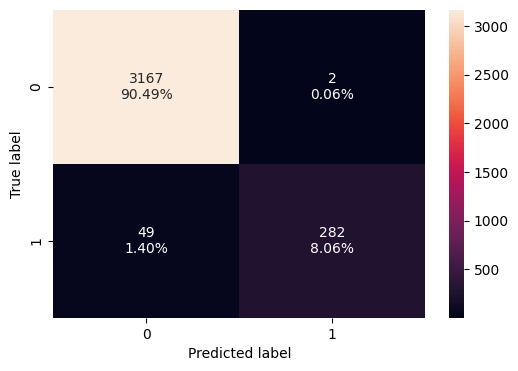

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

**Observations:**

The confusion matrix indicates high classification accuracy, with 90.49% of true negatives (3167 correctly classified as 0) and 8.06% of true positives (282 correctly classified as 1). There are few misclassifications, with only 49 false negatives and 2 false positives, suggesting a well-balanced model with strong predictive


In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.985429,0.851964,0.992958,0.917073


**Observations:**

The model achieves a high accuracy of 98.54%, indicating strong overall performance. The recall score of 85.20% suggests that the model effectively identifies positive cases. With a precision of 99.30%, most of the predicted positive cases are correct. The F1-score of 91.71% demonstrates a good balance between precision and recall. Overall, the model performs well with minimal misclassifications.

Visualizing the Decision Tree

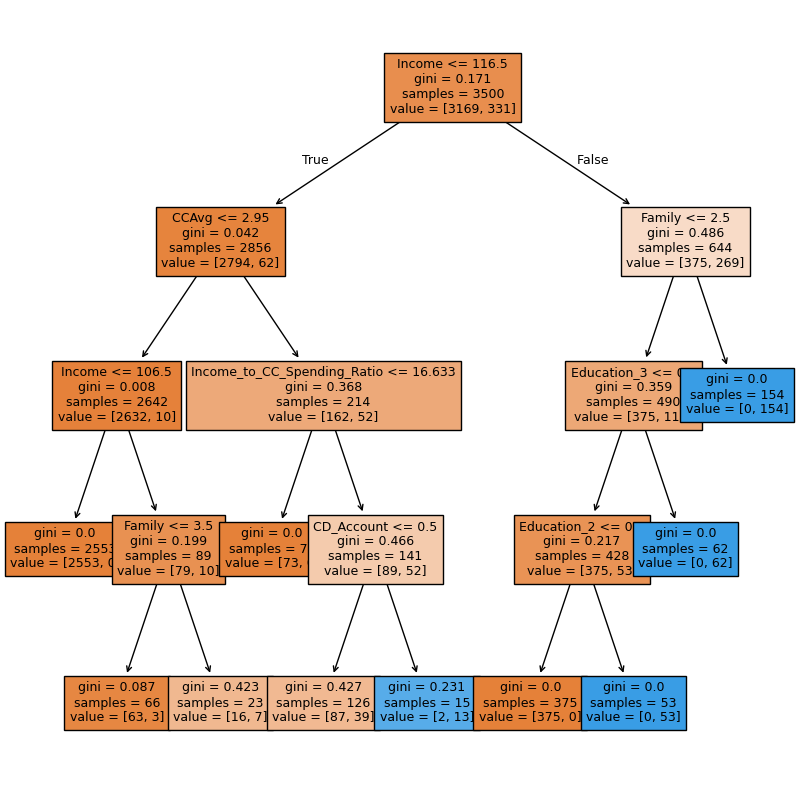

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observations:**

* Income is the most important split criterion: The tree first splits on income ≤ 116.5, indicating that income plays a significant role in determining loan approval.
* Low Gini values in certain nodes: Some terminal nodes have gini = 0, indicating perfect classification, particularly for Education_3 and Education_2, where all samples belong to the same class.
* Credit Card Average (CCAvg) ≤ 2.95: This is a key decision point among lower-income individuals, suggesting that spending habits influence loan approval.
* Higher family size correlates with different classifications: For individuals with family ≤ 2.5, education level is a key determining factor in loan approval.
* CD Account ownership is an influential feature: Among cases with moderate income and spending ratio, having a CD Account ≤ 0.5 affects classification.
* Loan acceptance is concentrated in specific branches: Most approvals are seen in branches where income is high and other financial behaviors, such as education level and account ownership, align favorably.

This decision tree provides clear rules for loan approval, heavily influenced by income, education, family size, and financial behavior.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income_to_CC_Spending_Ratio <= 16.63
|   |   |   |--- weights: [73.00, 0.00] class: 0
|   |   |--- Income_to_CC_Spending_Ratio >  16.63
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [87.00, 39.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [2.00, 13.00] class: 1
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.0

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Income                       0.317090
Family                       0.264986
Education_2                  0.176364
Education_3                  0.157892
CCAvg                        0.043021
Income_to_CC_Spending_Ratio  0.024845
CD_Account                   0.015802
ZIPCode_92                   0.000000
ZIPCode_96                   0.000000
ZIPCode_95                   0.000000
ZIPCode_94                   0.000000
ZIPCode_93                   0.000000
Age                          0.000000
ZIPCode_91                   0.000000
CreditCard                   0.000000
Online                       0.000000
Securities_Account           0.000000
Mortgage                     0.000000
ZIPCode_Prefix               0.000000


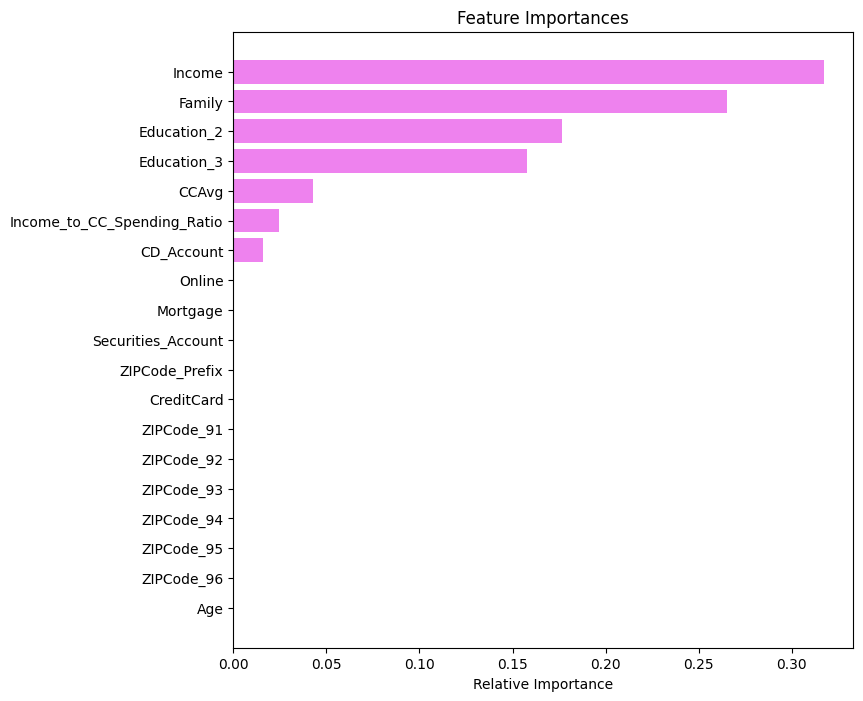

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Checking performance on test data

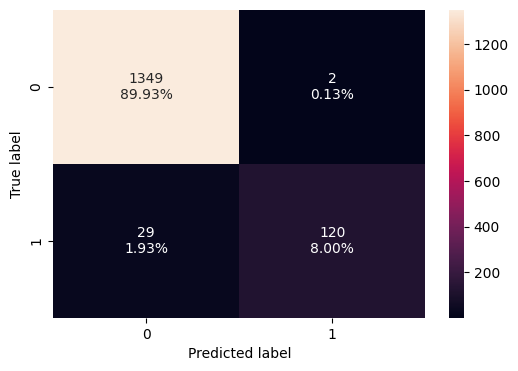

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.805369,0.983607,0.885609


Post-pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000167,0.000500
2,0.000214,0.000929
3,0.000242,0.002136
4,0.000265,0.003195
5,0.000347,0.005277
6,0.000381,0.005658
7,0.000381,0.006039
8,0.000381,0.006420
9,0.000435,0.006855


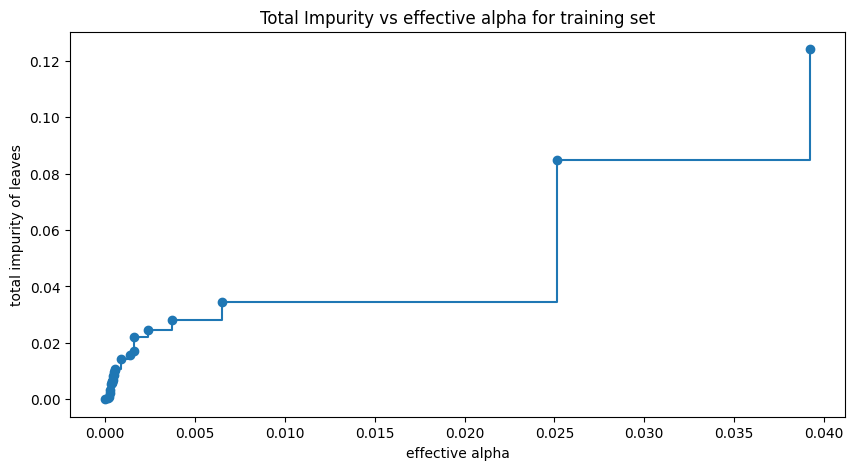

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


Observation: After we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

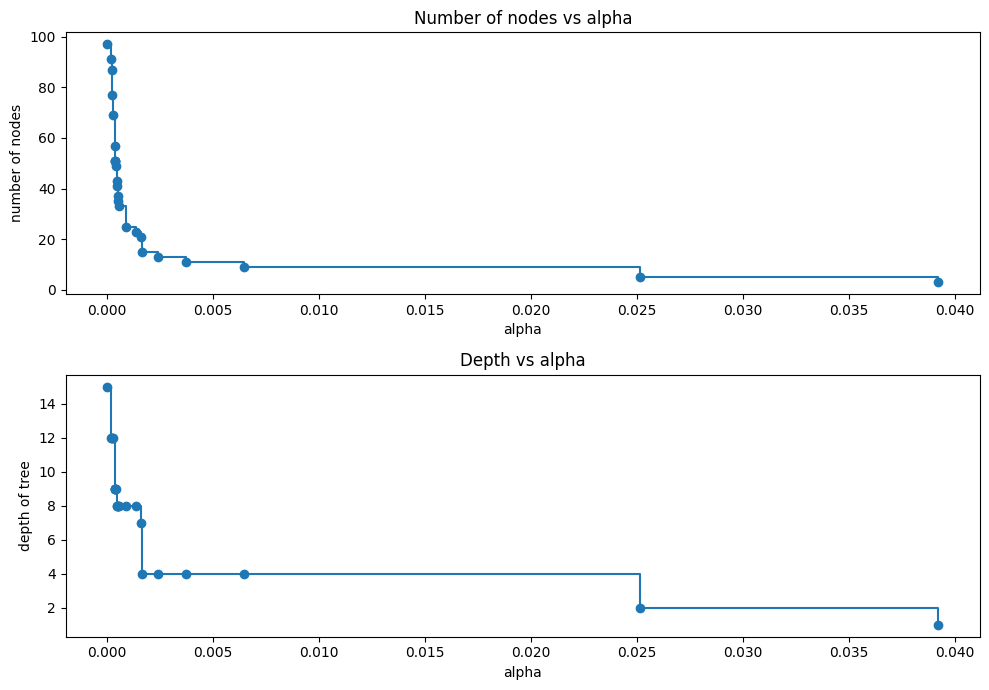

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

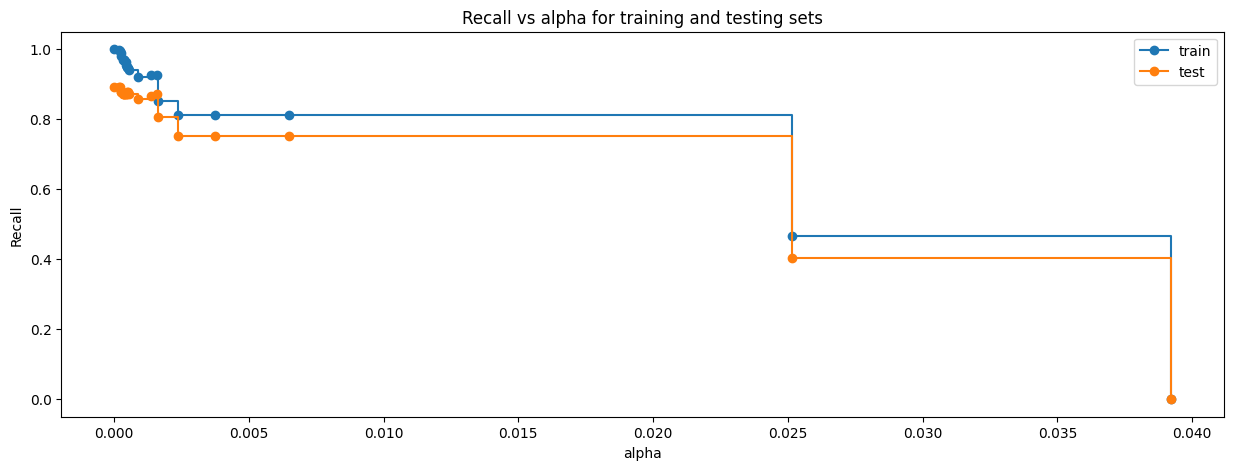

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


Optimal ccp_alpha selected: 0.006472814718223814


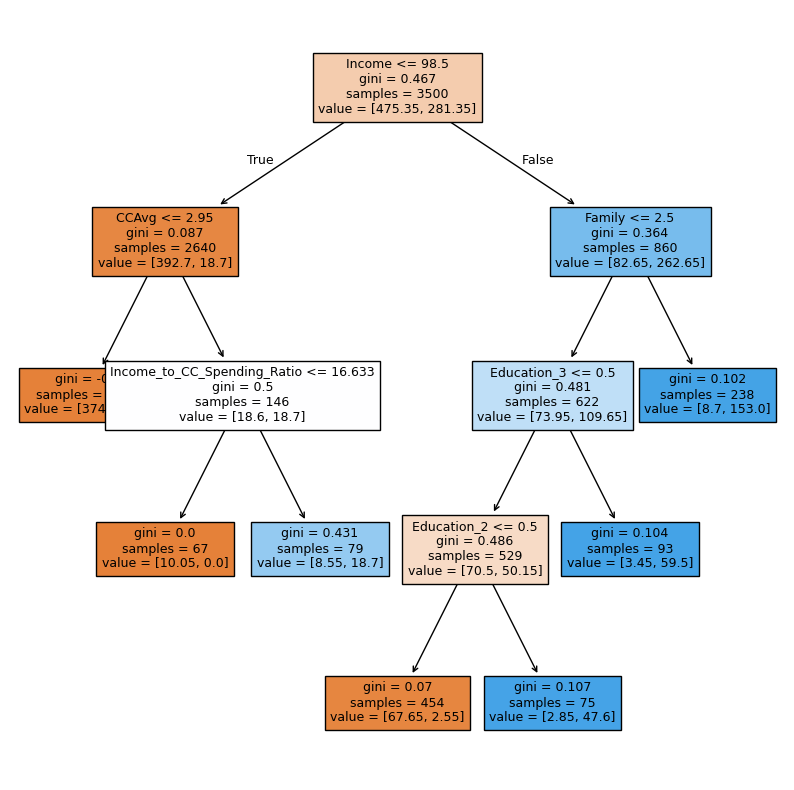

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income_to_CC_Spending_Ratio <= 16.63
|   |   |   |--- weights: [10.05, 0.00] class: 0
|   |   |--- Income_to_CC_Spending_Ratio >  16.63
|   |   |   |--- weights: [8.55, 18.70] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.85, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [8.70, 153.00] class: 1

                                  Imp
Income                       0.622583
Education_2                  0.156632
Education_3                  0.075206
Family                       0.067888
CCAvg                        0.055274
Income_to_CC_Spending_Ratio  0.022418
ZIPCode_92  

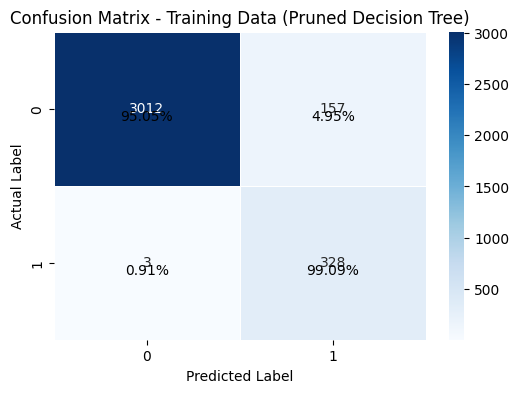


Confusion Matrix - Test Data (Pruned Decision Tree):


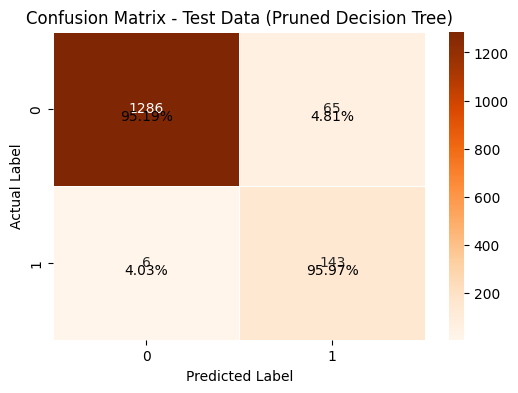

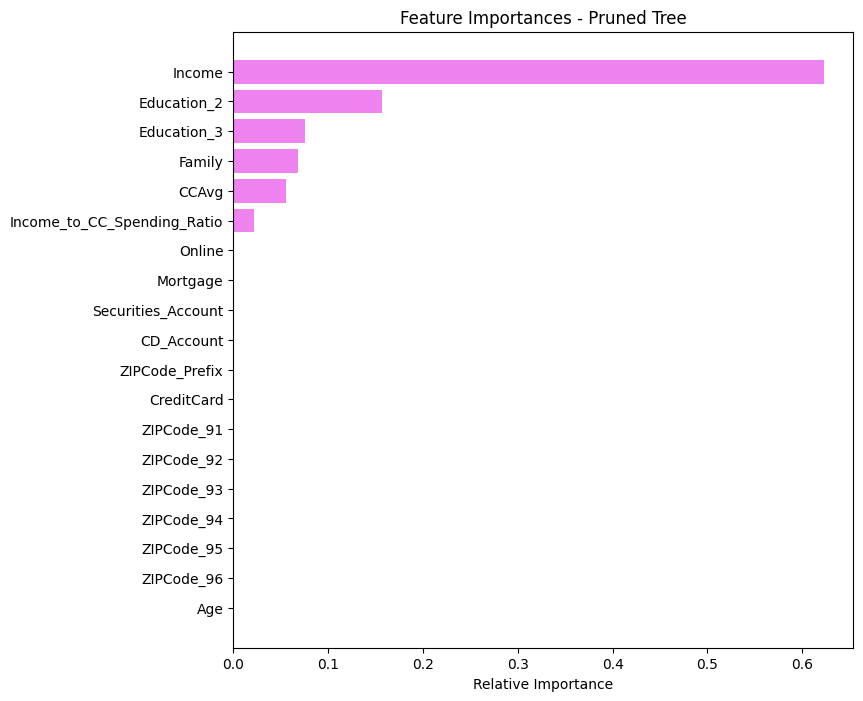

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -------------------------------
# Determine Optimal ccp_alpha
# -------------------------------

# Fit an initial unpruned tree to get effective alphas
path = DecisionTreeClassifier(random_state=1).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude the maximum alpha value (prunes everything)

# Perform cross-validation to find the best ccp_alpha
cv_scores = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')  # Use recall to evaluate pruning effect
    cv_scores.append(scores.mean())

# Select the best alpha (the one that maximizes recall while keeping the tree balanced)
best_ccp_alpha = ccp_alphas[np.argmax(cv_scores)]

print(f"Optimal ccp_alpha selected: {best_ccp_alpha}")

# -------------------------------
# Train Decision Tree with Selected ccp_alpha
# -------------------------------

estimator_2 = DecisionTreeClassifier(
    ccp_alpha=best_ccp_alpha,  # Optimized alpha
    class_weight={0: 0.15, 1: 0.85},  # Handling class imbalance
    random_state=1
)

# Train the pruned decision tree
estimator_2.fit(X_train, y_train)

# -------------------------------
# Visualizing the Pruned Decision Tree
# -------------------------------
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=X_train.columns,
    filled=True,
    fontsize=9,
    node_ids=False,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

print(tree.export_text(estimator_2, feature_names=X_train.columns.tolist(), show_weights=True))

# -------------------------------
# Feature Importance Analysis
# -------------------------------
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# -------------------------------
# Confusion Matrix - Training Data
# -------------------------------
print("\nConfusion Matrix - Training Data (Pruned Decision Tree):")
train_cm = confusion_matrix(y_train, estimator_2.predict(X_train))

# Convert to percentage
train_cm_percent = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Training Data (Pruned Decision Tree)")

# Adding percentage labels
for i in range(train_cm.shape[0]):
    for j in range(train_cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"\n{train_cm_percent[i, j]:.2f}%",
                 ha='center', va='center', color='black', fontsize=10)

plt.show()

# -------------------------------
# Confusion Matrix - Test Data
# -------------------------------
print("\nConfusion Matrix - Test Data (Pruned Decision Tree):")
test_cm = confusion_matrix(y_test, estimator_2.predict(X_test))

# Convert to percentage
test_cm_percent = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Oranges", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Test Data (Pruned Decision Tree)")

# Adding percentage labels
for i in range(test_cm.shape[0]):
    for j in range(test_cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"\n{test_cm_percent[i, j]:.2f}%",
                 ha='center', va='center', color='black', fontsize=10)

plt.show()

# -------------------------------
# Feature Importance of Pruned Model
# -------------------------------
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances - Pruned Tree")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



## Model Performance Comparison and Final Model Selection

In [ ]:
# -------------------------------
# Training Performance Comparison
# -------------------------------

# Ensure all models have been evaluated before this step
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_perf_train.T],  # Ensure variable names match
    axis=1,
)

# Rename columns to indicate different versions of Decision Tree models
models_train_comp_df.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

# Display the comparison of training performance
print("Training Performance Comparison:")
models_train_comp_df


Training Performance Comparison:


,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.985429,0.985429
Recall,1.0,0.851964,0.851964
Precision,1.0,0.992958,0.992958
F1,1.0,0.917073,0.917073


In [ ]:
# -------------------------------
# Testing Performance Comparison
# -------------------------------

# Ensure all models have been evaluated before this step
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_perf_test.T],  # Ensure variable names match
    axis=1,
)

# Rename columns to indicate different versions of Decision Tree models
models_test_comp_df.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

# Display the comparison of testing performance
print("Testing Performance Comparison:")
models_test_comp_df


Testing Performance Comparison:


,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980667,0.979333,0.979333
Recall,0.892617,0.805369,0.805369
Precision,0.910959,0.983607,0.983607
F1,0.901695,0.885609,0.885609


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___